# Polynomial regression

In [31]:
import sys

sys.path.append("..")

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from supervised.polynomial_regression import PolynomialRegression
from utils.metrics import mean_squared_error

In [2]:
sns.set_style("whitegrid")

## Creating data

In [39]:
np.random.seed(30_08_2000)

x = 1.5 * np.linspace(0, 1.5 * np.pi, 150)
y = np.sin(x) + 0.3 * np.random.randn(150)

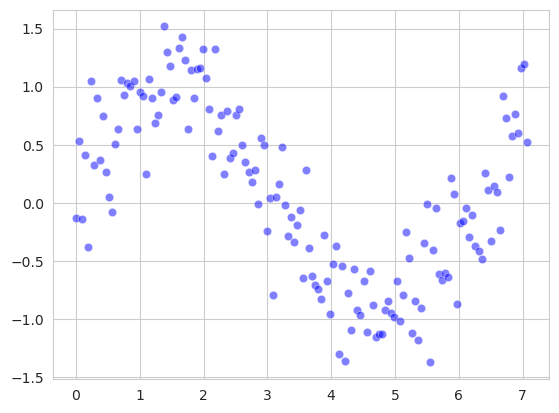

In [40]:
sns.scatterplot(x=x, y=y, color="blue", alpha=0.5)
plt.show()

In [41]:
# train-test split
np.random.seed(30_08_2000)
train_indices = np.random.choice(len(x), round(len(x) * 0.8), replace=False)
test_indices = np.array(list(set(range(len(x))) - set(train_indices)))

x_train = x[train_indices].reshape(-1, 1)
y_train = y[train_indices].reshape(-1, 1)

x_test = x[test_indices].reshape(-1, 1)
y_test = y[test_indices].reshape(-1, 1)

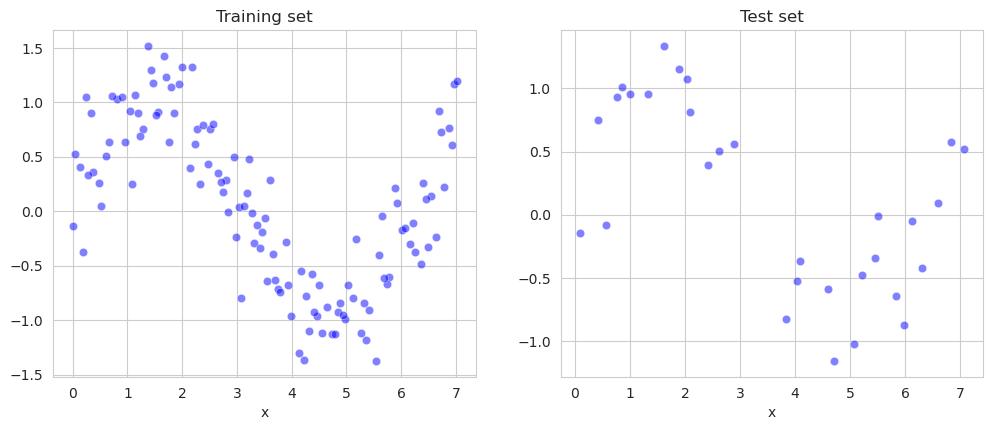

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4.5))

sns.scatterplot(x=x_train.flatten(), y=y_train.flatten(), color="blue", alpha=0.5, ax=ax[0])
ax[0].set_title("Training set")
ax[0].set_xlabel("x")

sns.scatterplot(x=x_test.flatten(), y=y_test.flatten(), color="blue", alpha=0.5, ax=ax[1])
ax[1].set_title("Test set")
ax[1].set_xlabel("x")

plt.show()

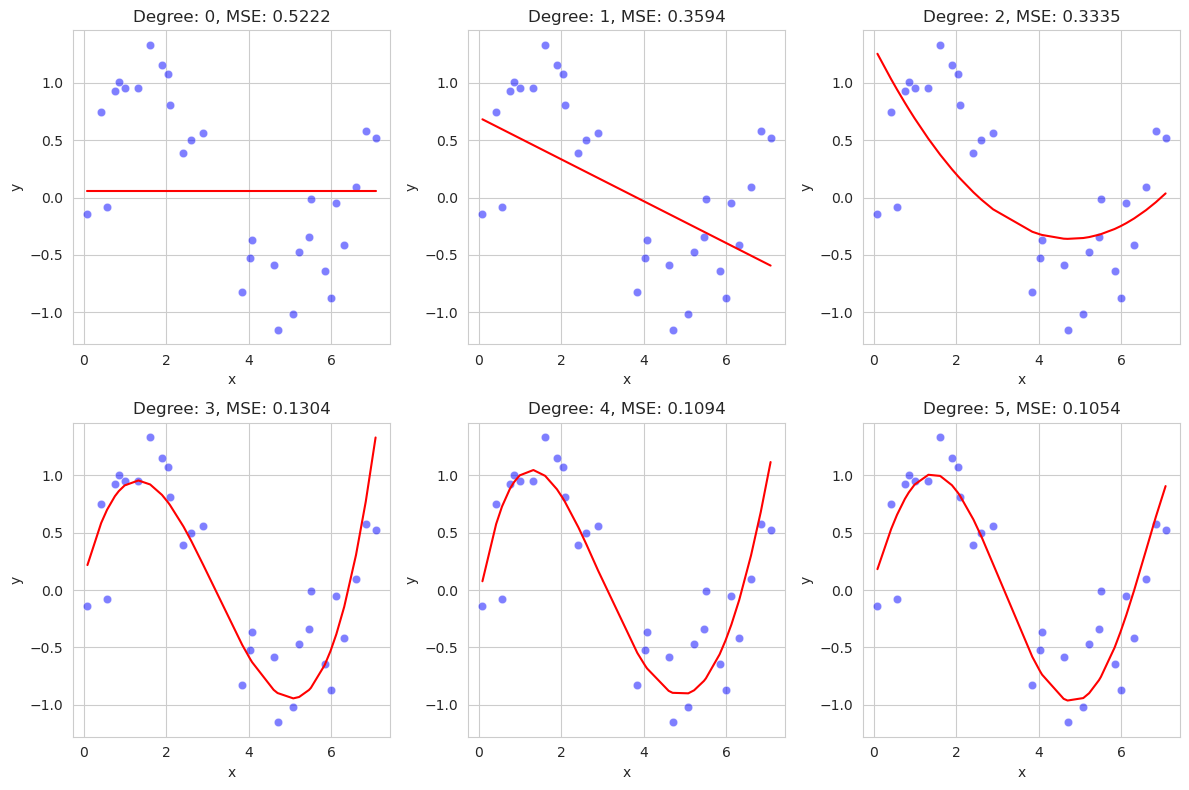

In [44]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))

for degree, axi in enumerate(ax.flat):
    poly = PolynomialRegression(degree=degree)
    poly.fit(x_train, y_train)
    pred = poly.predict(x_test)
    mse = mean_squared_error(y_test, pred)
    
    sns.scatterplot(x=x_test.flatten(), y=y_test.flatten(), color="blue", alpha=0.5, ax=axi)
    sns.lineplot(x=x_test.flatten(), y=pred.flatten(), color="red", ax=axi)
    axi.set_title(f"Degree: {degree}, MSE: {mse:.4f}")
    axi.set_xlabel("x")
    axi.set_ylabel("y")
plt.tight_layout()    
plt.show()